### Importing necessary noUDF

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import os
import sys

### Defining the path to necessary packages.

In [7]:
module_path = os.path.join(os.path.dirname( os.getcwd())) #Find the directory where we can find the 'Modules' library.
sys.path.append(module_path)

from Modules.Classes import MultiOutputLinearRegression, ModelComparator


### Defining constants for the models.

In [8]:
#The datatype of each feature of the dataframe.
dtypes = { "Make": "string", 
            "Model":"string",
            "Vehicle Class":"string",
            "Engine Size(L)":np.float64,
            "Cylinders":np.int16,
            "Transmission":"string",
            "Fuel Type":"string",
            "Fuel Consumption City (L/100 km)":np.float64,
            "Fuel Consumption Hwy (L/100 km)":np.float64,
            "Fuel Consumption Comb (L/100 km)":np.float64,
            "Fuel Consumption Comb (mpg)":np.float64,
            "CO2 Emissions(g/km)":np.float64}


# Define the dictionary of  ML models we will be training.
Models = {
    "DrzewkoDecyzyjne": DecisionTreeClassifier(criterion="gini", splitter="best", min_samples_split=2), 
    "LasLosowy": RandomForestClassifier(n_estimators=15, criterion='gini'), 
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "RegresjaLogistyczna": LogisticRegression(max_iter = 200,),
   "RegresjaLiniowa":MultiOutputLinearRegression(LinearRegression())
}    

#For each ML model create it's corresponding parameter space.
Models_hipparams = {"DrzewkoDecyzyjne":{"criterion":['gini','entropy'],
                                       "splitter":['best','random'],
                                       "min_samples_split":[2,3],
                                        "min_samples_leaf":[2,3]},

                    "LasLosowy":{"n_estimators":list(range(5, 25, 5)),
                                        "min_samples_split":[2,3],
                                       "min_samples_leaf":[2,3]},
                                       
                  "KNN": {"n_neighbors":list(range(1, 10, 2)),
                            "p":[1,2]},
                            
                        "RegresjaLogistyczna": {
                        "max_iter":[250, 300],
                            "penalty":['l2'],
                              "solver":['liblinear','newton-cg',],
                              
                        },
                     "RegresjaLiniowa":{},
                             }



### Exploratory Data Analysis (EDA) section.

In [9]:

target_var: str = "CO2 Emissions(g/km)" #The target variable's name
file_name:str = "CO2Emission.csv" #The filename


n_splits:int = 1 # How many times we'll be learning each model.
train_size:float = 0.8 #The size of training set
test_size:float  = 1 - train_size #The size of testing set.


ModelComparator = ModelComparator(Filename = file_name, target_var = target_var, dtypes = dtypes, 
                                        Models = Models, Models_hipparams = Models_hipparams, 
                                        n_splits = n_splits, train_size  = train_size, test_size = test_size, 
                                        bins = [-float('inf'), 150, 250, float('inf')], show_plots = False
                                        )

ModelComparator.descriptive_statistics()


### Training-the-models section.

In [10]:
ModelComparator.train_models()

0


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.13769733212159352, -0.11040347997253397, -0.2772326913012272, -0.10078412734671116, -0.3770996745563874, -0.1645797907807484, -0.211406569032676, -0.3942192752429576, -0.14605007594171251, -0.260873245423434, -0.4175756126098448, -0.30010437775659166, -0.2413213442629662, -0.238498775301286, -0.1696449653077703, -0.20572473847593545, -0.267283863372697, -0.2543010749801814, -0.15613409871034392, -0.21615787169375816, -0.1582877742228606, -0.13268846934354428, -0.22157232431951146, -0.3422705729128725, -0.23420114806551587, -0.15935369720403486, -0.273544287202482, -0.18122469584548853, -0.31389038079060255, -0.17063995897339673, -0.11192635853190992, -0.18764983291616696, -0.293256988695335, -0.22460770307587966, -0.5233663224089419, -0.41554360243619143, -0.5507893284863741, -0.2915200119822858, -0.14948701855038718

### Visualization the results section.

c:\Users\pawel\OneDrive\Życie\Praca\Programowanie\AllGitHubRepositories\Wsp-pracaNaukowa\Modules\Classes.py:887: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = metrics_dataframe_melted, y = "metric_value", x = "train_type",ax = boxplot_axes,
c:\Users\pawel\OneDrive\Życie\Praca\Programowanie\AllGitHubRepositories\Wsp-pracaNaukowa\Modules\Classes.py:887: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = metrics_dataframe_melted, y = "metric_value", x = "train_type",ax = boxplot_axes,
c:\Users\pawel\OneDrive\Życie\Praca\Programowanie\AllGitHubRepositories\Wsp-pracaNaukowa\Modules\Classes.py:887: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

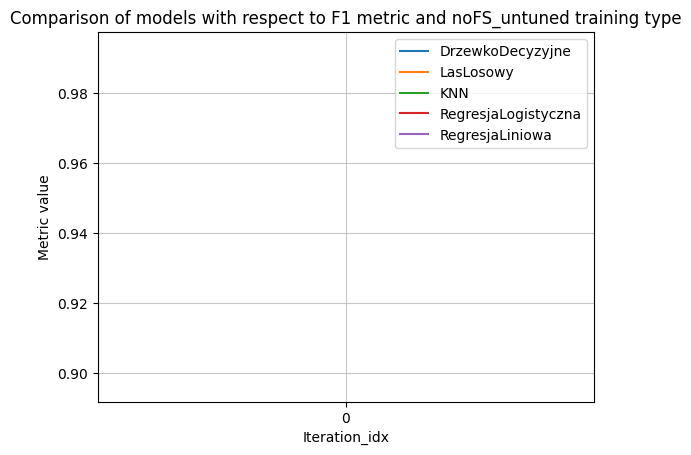

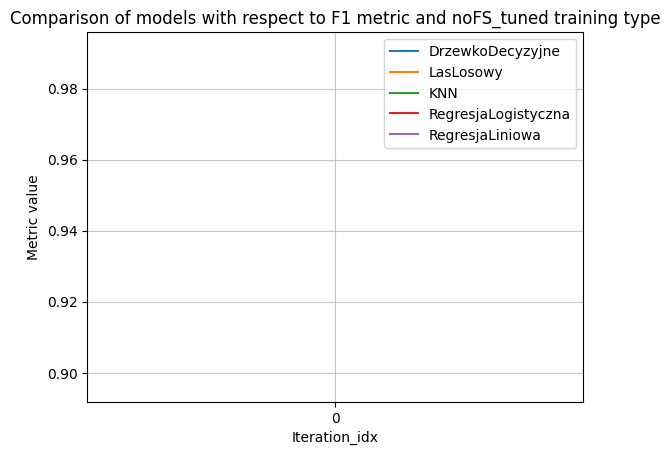

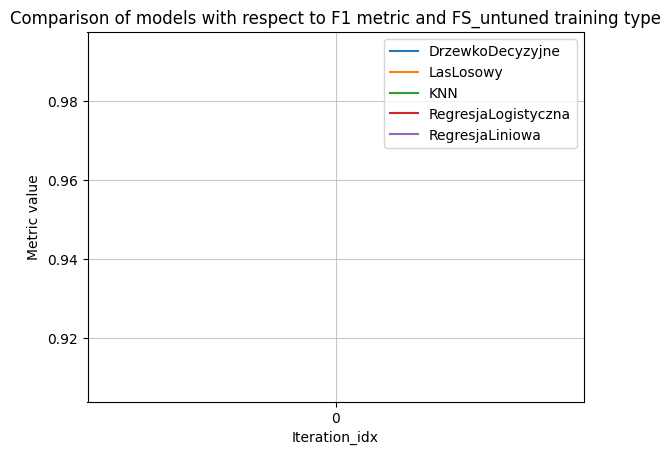

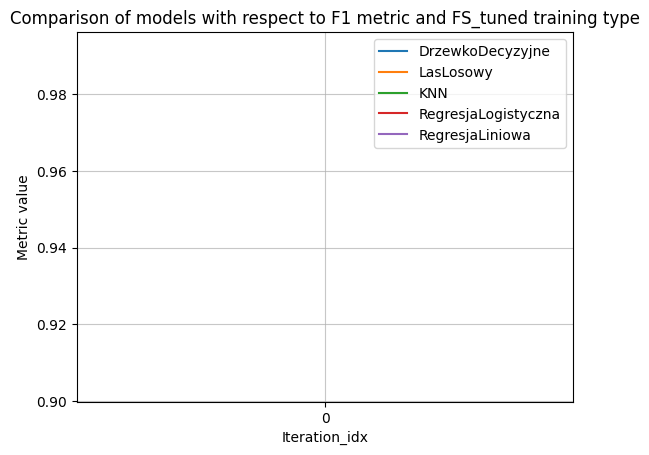

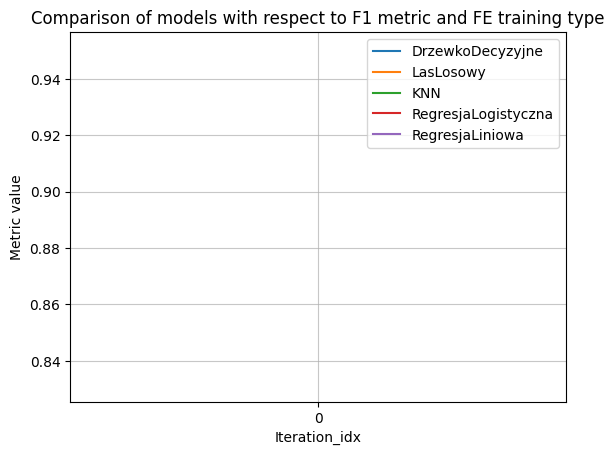

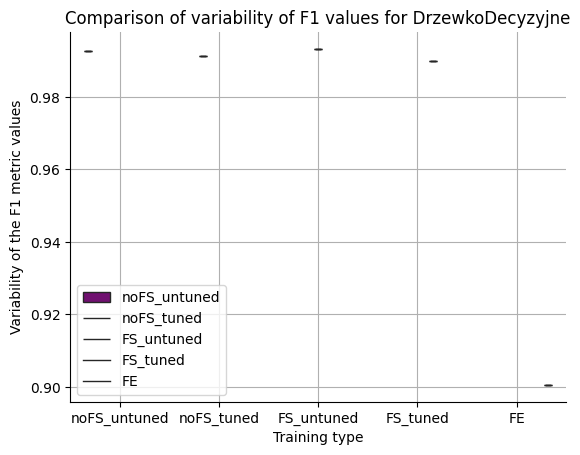

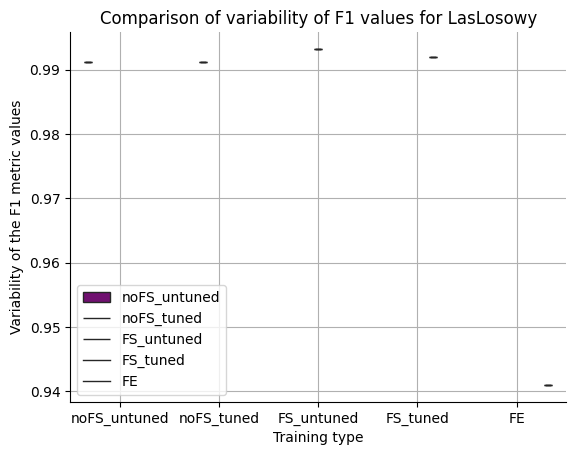

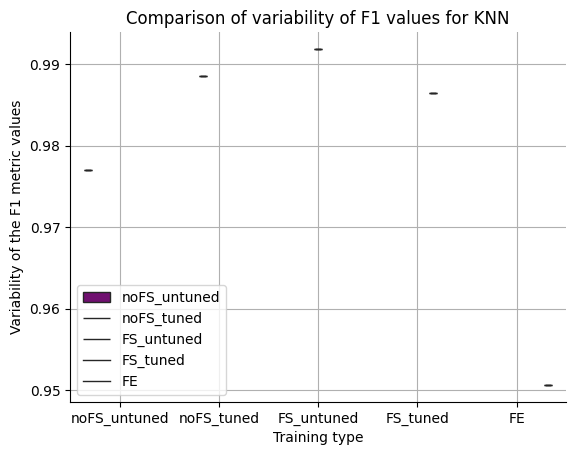

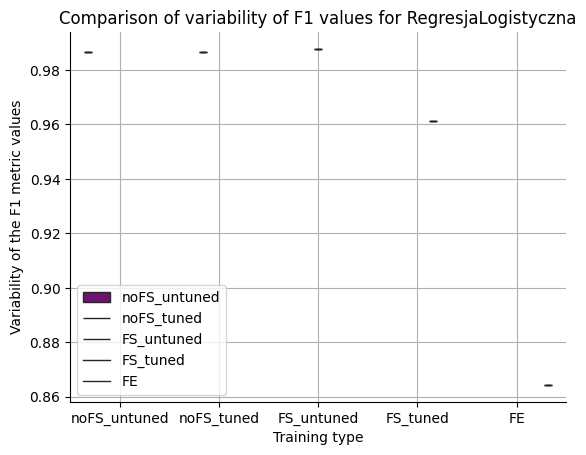

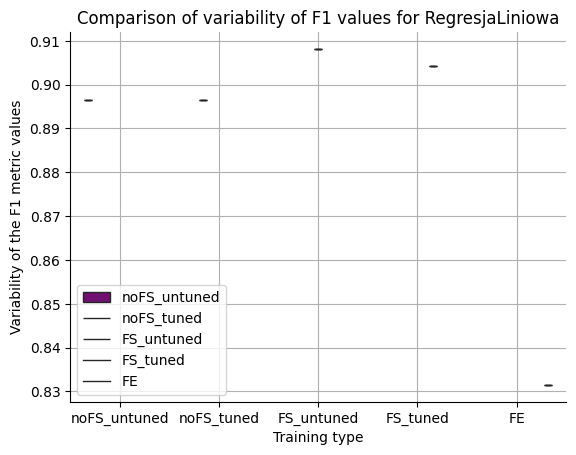

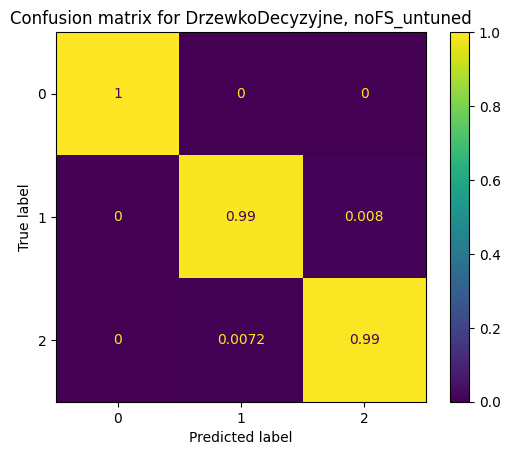

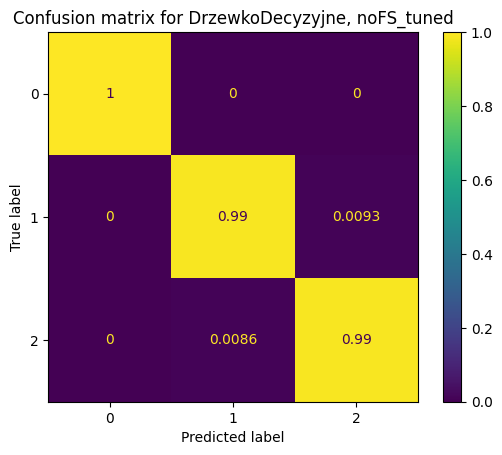

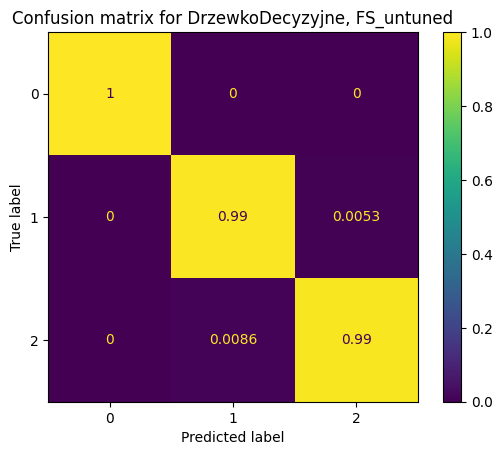

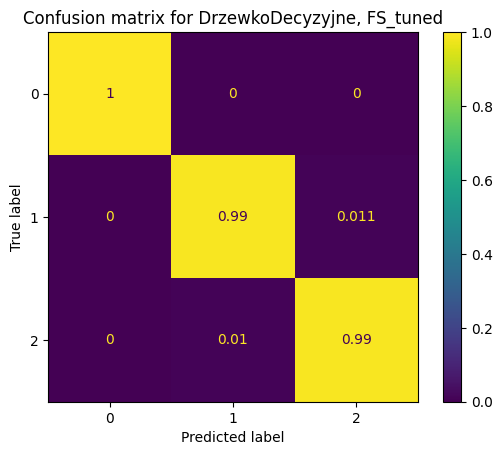

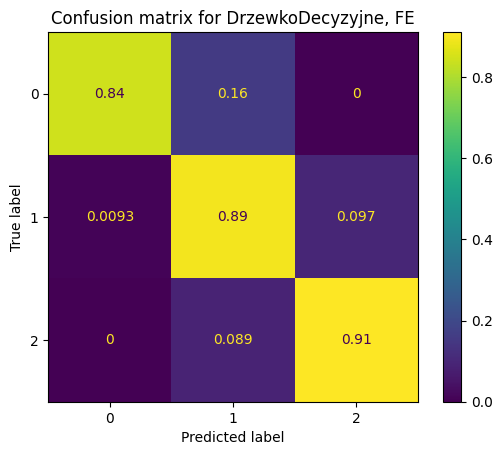

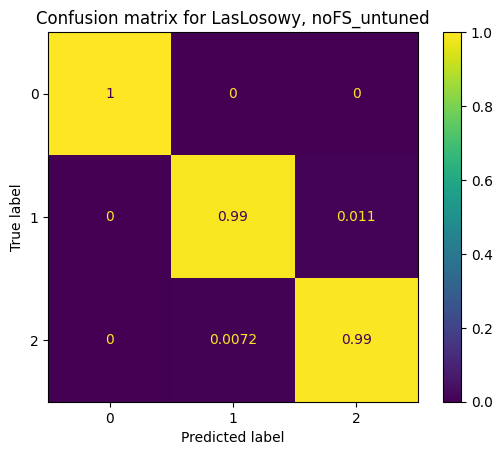

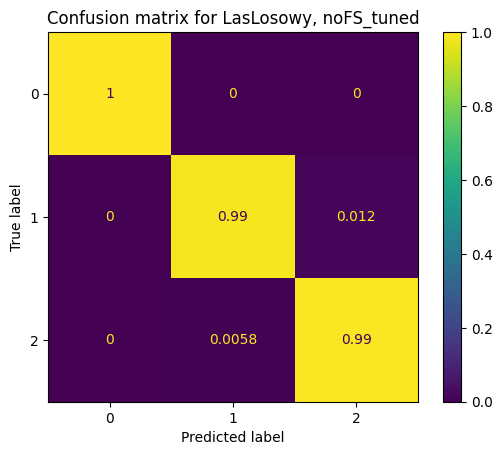

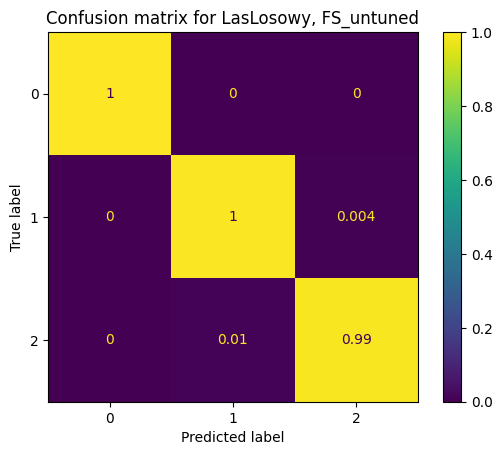

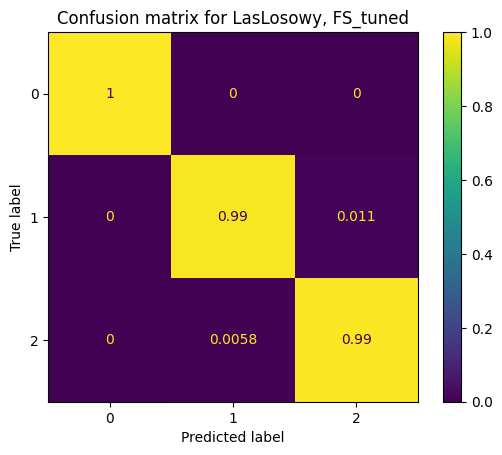

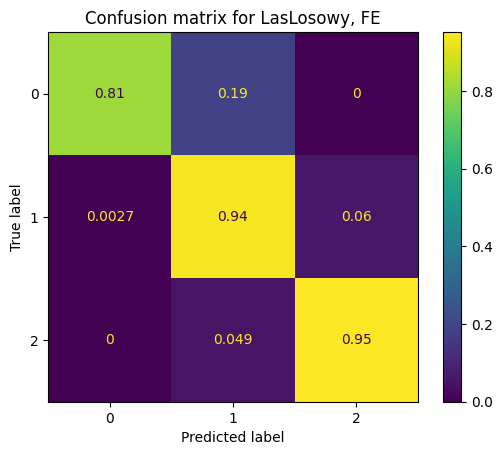

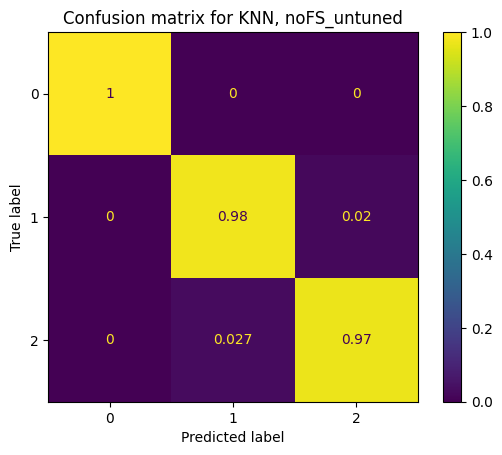

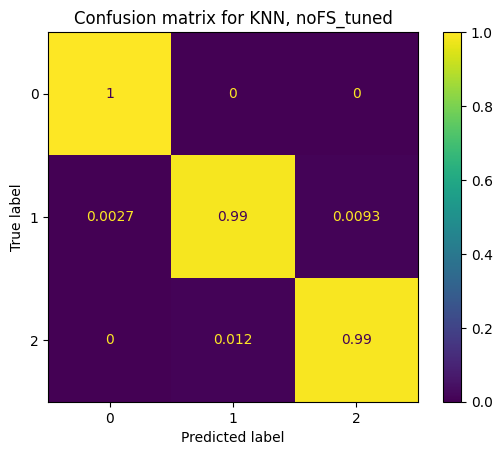

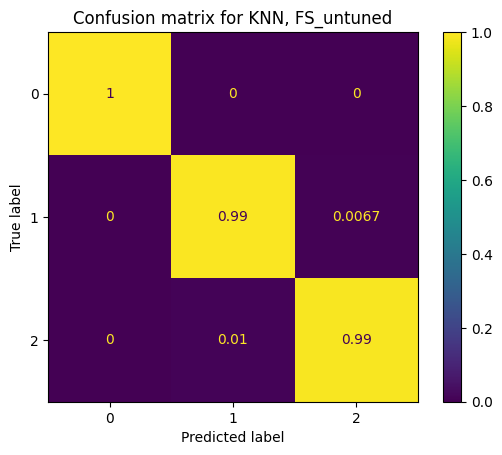

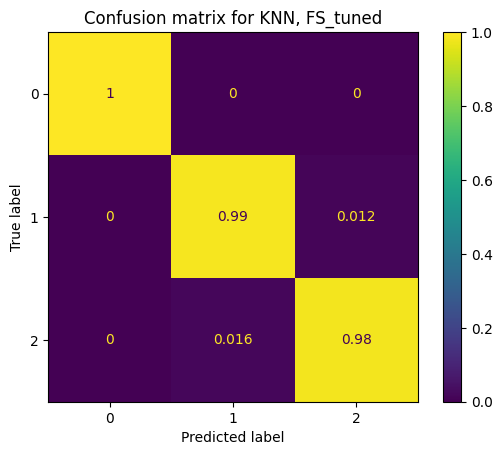

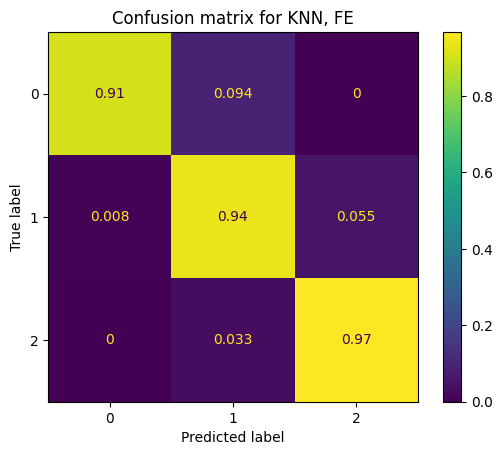

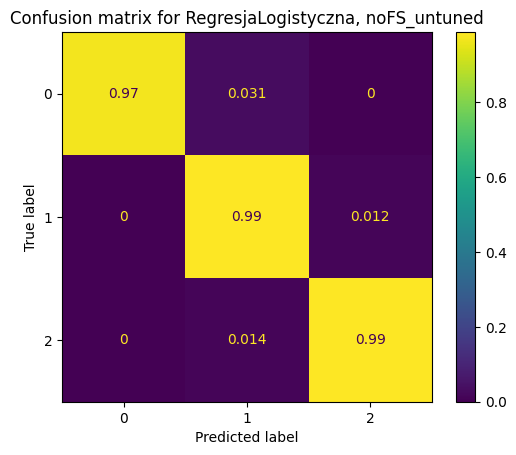

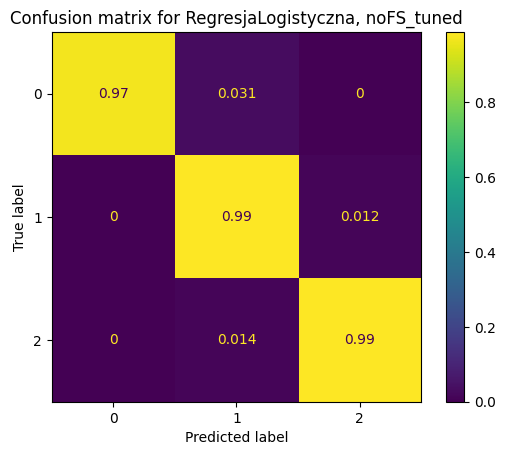

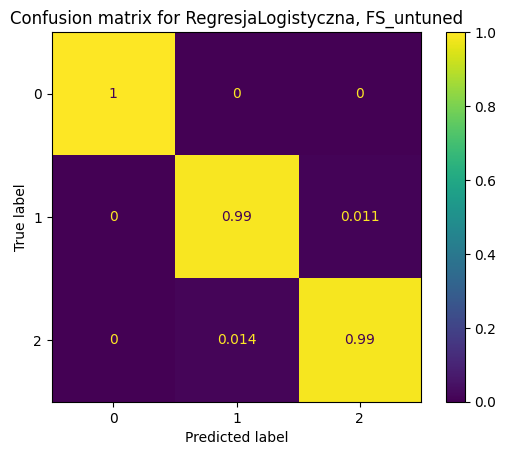

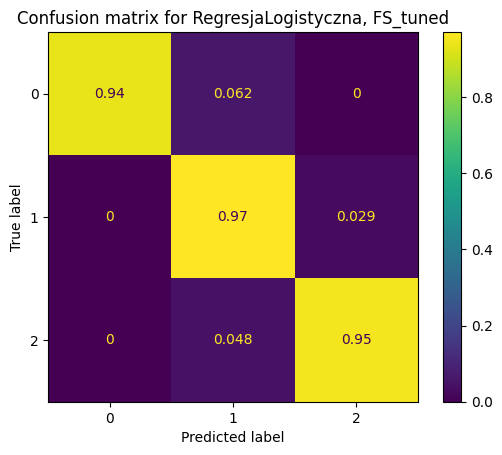

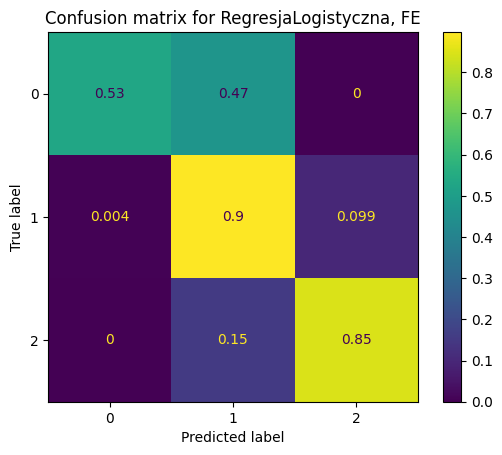

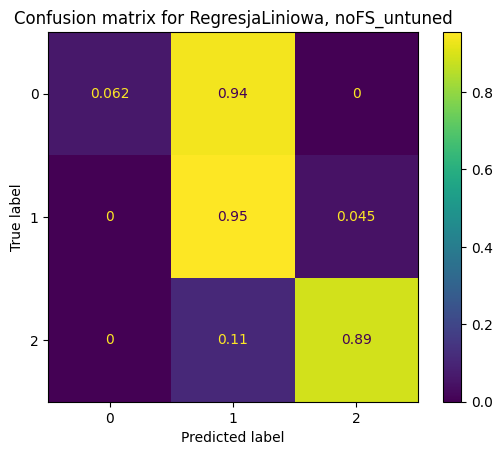

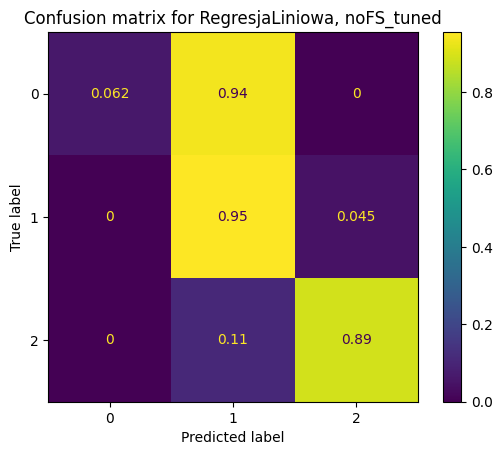

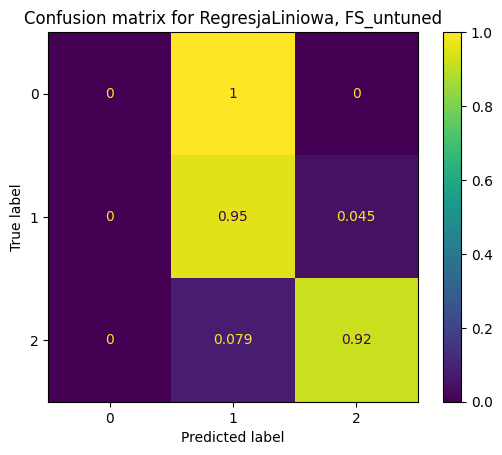

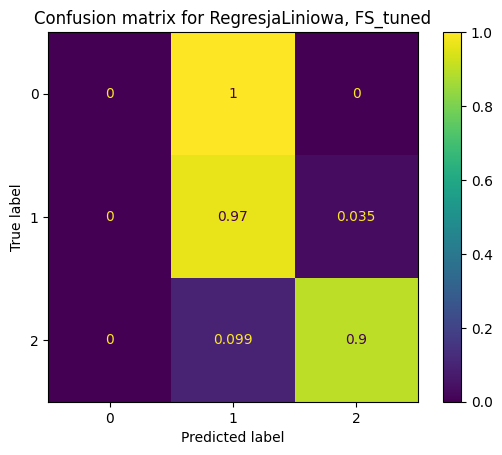

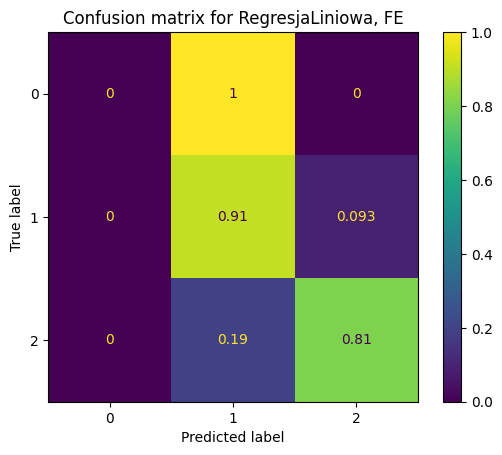

In [11]:
ModelComparator.compare_models()